In [1]:
#例19.1

In [2]:
import numpy as np
#着火次数k
k=[0,1,2,3,4,5,6,7]
#发生k次着火的天数
n_k=[75,90,54,22,6,2,1,0]
#np.dot(k,n_k)总着火次数，sum(n_k)是总天数，两者的商为平均着火次数，即样本均值
#用样本均值估计总体均值lamda
lamda=np.dot(k,n_k)/sum(n_k)
lamda

1.216

In [3]:
#例19.2

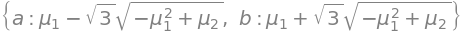

In [4]:
from sympy import symbols,init_printing,solve
#启动环境中最佳打印资源
init_printing() 
mu1,mu2,a,b=symbols('mu1 mu2 a b',real=True)
#求解a，b
#dict=True，使结果以字典形式返回
solve([mu1-a/2-b/2,mu2-(b-a)**2/12-(a+b)**2/4],a,b,dict=True)[0]

In [5]:
from scipy.stats import uniform,moment
np.random.seed(0)
a,b,n=5,10,1000
#从[5,10]区间上的均匀分布中，生成容量为1000的样本
datas=uniform(a,b-a).rvs(size=n)
mean_datas=np.mean(datas)
#moment(datas,moment=2)求数据的二阶中心矩
estimate_a=mean_datas-np.sqrt(3*moment(datas,moment=2))
estimate_b=mean_datas+np.sqrt(3*moment(datas,moment=2))
estimate_a,estimate_b

In [6]:
#例19.3

In [7]:
from scipy.stats import norm 
#从标准正太分布中生成容量为1000的样本
X=norm.rvs(size=1000)
#计算样本一阶矩与二阶矩
A_1=np.mean(X)
A_2=np.mean(X**2)
#估计总体均值及方差
mu,sigma2=A_1,A_2-A_1**2
mu,sigma2

In [8]:
#例19.4

In [9]:
from scipy.stats import binom
np.random.seed(0)
X=binom.rvs(1,0.3,size=10)
X

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [10]:
from sympy import diag,det,log,diff
p=symbols('p',positive=True)
#以每个样本值出现的概率为主对角线，生成对角阵，目的在于借助对角阵行列式的计算公式构造连乘
A=diag([p**X[i]*(1-p)**(1-X[i]) for i in range(len(X))],unpack=True)
#似然函数
L=det(A) 
#求似然函数的最大值点与求对数似然函数的最大值点等价
ln_L=log(L)
#返回对数似然函数关于p的一阶导数为0的点，即最大值点
solve(ln_L.diff(p))

In [11]:
#例19.5

In [12]:
from sympy import E,sqrt,pi
np.random.seed(1)
#在均值为1，标准差为2的正态分布下，生成容量为20的一组样本
X=norm(1,2).rvs(size=20)
mu=symbols('mu',real=True)
sigma=symbols('sigma',positive=True)
#主对角线为不同样本值所相应的正态分布下的概率密度函数值
A=diag([E**(-(X[i]-mu)**2/2/sigma**2)/sqrt(2*pi)/sigma \
       for i in range(len(X))],unpack=True)
L=det(A)
ln_L=log(L)
#返回总体均值以及标准差的最大似然估计值
solve([ln_L.diff(mu),ln_L.diff(sigma)])

In [13]:
np.random.seed(1)
X=norm(1,2).rvs(size=20)
#fit方法默认返回最大似然估计值
norm.fit(X)

In [14]:
#例19.6

In [15]:
X=uniform.rvs(1,9,size=100)
#uniform(loc,scale)服从区间[loc,loc+scale]上的均匀分布
loc,scale=uniform.fit(X)
#a，b的最大似然估计
a,b=loc,loc+scale
a,b